# Introduction
## Goal. 
The goal of this lab is to study the application of Genetic Programming (GP) to various kinds of problems. We will also investigate the parametrization of the algorithm and its effect on the algorithmic performance. This lab continues the use of the deap$^{[1]}$ framework for the Python programming language we have seen in the previous lab. All the exercises are based on examples taken from the deap tutorial on Genetic Programming$^{[2]}$. If you did not participate in the previous lab, you may want to look that over first and then start this lab’s exercises.

--- 

[1]: Distributed Evolutionary Algorithms in Python: https://github.com/DEAP/deap

[2]: GP tutorials: https://deap.readthedocs.io/en/master/tutorials/advanced/gp.html

# Exercise 1
In this exercise we will use GP as a supervised Machine Learning (ML) technique for solving one of the classical problems where GP has shown the most straightforward and successful applications: symbolic regression. Symbolic regression is a form of function approximation that consists in fitting some data in the form of input-output samples to determine an expression (a symbolic formula) that approximates those samples. 
Assuming a set $S$ of $N$ samples $(S = {s_1, s_2, . . . , s_N })$, where each sample is composed of an n-dimensional input and a scalar output $y$, in the following form:

<center>$s_1 : [x_1, x_2, . . . , x_n] → y_1$
<center>$s_2 : [x_1, x_2, . . . , x_n] → y_2$
<center>$· · ·$
<center>$s_N : [x_1, x_2, . . . , x_n] → y_N$

the goal is to find an expression $f(·)$ such that $y = f(x_1, x_2, . . . , x_n) \forall s \in S$. Usually, an error metric such as the MSE (Mean Squared Error), $MSE= \frac{1}{N}\sum_{i \in N}[y - f(x_1, x_2, . . ., x_n)]^2$, is used to measure an individual’s fitness in terms of approximation error.

Here, we will consider a 1-dimensional input ($n = 1$), such that the set of samples is composed of couples $(x, y)$. By default, $N = 20$ equidistant samples are generated in the range $[−1, 1]$ by means of the polynomial function: 
    
<center> $y = f^{*}(x) = x^4 + x^3 + x^2 + x$

These samples are then used to evaluate the fitness of the evolving GP trees. The goal is to find an optimal tree describing a formula that approximates $f^{*}(·)$ such that the MSE is minimized$^{[1]}$.
The next cell contains the main code. Take a look at it and spend some time to understand its main steps.

One of the most important aspects is the definition of the *primitive set* (also called  non-terminal or function set), which in this case contains the four basic arithmetic operations, the trigonometric functions `cos` and `sin`, and the `neg` operator (such that `neg(x)=-x`). Note that the standard division operator is replaced by a custom function named `protectedDiv`, which handles divisions by zero without returning errors (this detail is often very important in GP-based symbolic regression, where it's not possible to check a priori all possible inputs to a division node). Note also that in `deap` the configuration of the Evolutionary Algorithm (in this case, Genetic Programming) is obtained by means of a series of function hooks registered in a `creator` object (that handles the initialization of the individual genotypes with their fitness values) and a `toolbox` object (that handles all the other methods that are called during the algorithm execution: evaluation, selection, mutation, crossover, etc.). All function hooks come with a user-defined alias (the first argument of the methods `create`, `register` and `decorate`). The evaluation of the fitness function (in this case, the MSE) is implemented in the method `evalSymbReg`, that calls the method `generatorFunction` (the only part of code you should change if you want to test a different generator function).

![tree.png](img/img_11/tree.png)

The relevant parameters of the Genetic Programming algorithm can be found at the beginning of the script. In particular, consider the parameters `GP_POP_SIZE`, `GP_NGEN`, `GP_CXPB`, `GP_MUTPB`,`GP_TRNMT_SIZE`, and `GP_HOF_SIZE`. These parameters represent, respectively: the population size (`GP_POP_SIZE`),  the number of generations (`GP_NGEN`), the crossover probability (`GP_CXPB`), the mutation probability (`GP_MUTPB`), the tournament size (`GP_TRNMT_SIZE`) and the size of the Hall-of-Fame (`GP_HOF_SIZE`)$^{[2]}$. See the documentation$^{[3]}$ for further explanations on the implementation details of this exercise.

At the end of the run, the script will show you (and save on files, in the `results` folder) a graphical representation$^{[4]}$ of the best evolved tree (similar to that shown in the figure above), as well as a comparison between the values of the real and GP-approximated data, and the evolutionary trends of the trees' fitness and size (i.e., number of nodes) across generations, see the figure below.

![tree.png](img/img_11/symbreg_merged.png)
    
- Is the GP algorithm able to approximate the given polynomial, with the standard configuration? What happens when you run the script multiple times? Do you always obtain the same results, or not? Why?
    
- Try to change the generator function (e.g. to include trigonometric functions) defined in the method `generatorFunction`. Is the GP algorithm able to approximate more complicated generator functions? Which parameters can you change to improve the results?

---
    
[1]: Note that while in this synthetic example we know that samples are generated by a certain \emph{generator function} $f^*(\cdot)$, in practical applications we don't know if this function even exists -or has a meaningful physical/mathematical formulation. In other words, the goal of GP is to approximate the mapping between inputs and outputs in a purely data-driven approach.
    
[2]: Note that *deap* uses a structure called Hall-of-Fame to store the best individual(s) found during the evolutionary process. The size of this archive is determined by the parameter `GP_HOF_SIZE`. This structure is only used to report the best solutions at the end of the evolutionary process, and it is not to be confused with the Hall-of-Fame used in competitive co-evolution.
    
[3]: See https://deap.readthedocs.io/en/master/examples/gp_symbreg.html
    
[4]: The Python packages `pygraphviz` and `networkx` are required for this.

In [14]:
# Note: this cell will install the dependencies pygraphviz and networkx
# If you are using Windows, please follow the instructions that you will find here: 
#       https://pygraphviz.github.io/documentation/stable/install.html#windows
# If you are still not able to import pygraphviz due to an error like:
# 'ImportError: DLL load failed while importing _graphviz'
# you may solve this error by adding e.g. "C:\Program Files\Graphviz\bin" to the PATH environment variable.
#!python3 -m pip install networkx
# !brew install graphviz
# !python3 -m pip install graphviz
# !python3 -m pip install cgraph
# !python3 -m pip install python-pygraphviz

In [15]:
import os
print(os.getcwd())

/Users/gabrielepadovani/Desktop/Università/Bio_Inspired/lab11


EphemeralConstant is already defined, if you changed it restart the kernel
   	      	                        fitness                        	                      size                     
   	      	-------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min      	nevals	std    	avg    	gen	max	min	nevals	std    
0  	300   	7.90239	0  	1082.23	0.0573183	300   	87.3985	3.69333	0  	7  	2  	300   	1.51414
1  	217   	0.474348	1  	14.5231	0.050224 	217   	0.993615	3.83333	1  	13 	1  	217   	2.1037 
2  	203   	3.8513  	2  	1082.23	0.00252332	203   	62.3652 	3.45333	2  	14 	1  	203   	2.15897
3  	236   	0.305783	3  	4.03553	0.00252332	236   	0.45349 	3.47   	3  	15 	1  	236   	2.31857
4  	228   	0.269155	4  	3.65046	9.21358e-05	228   	0.390279	3.82333	4  	15 	1  	228   	2.52563
5  	218   	0.230784	5  	3.65046	0.00252332 	218   	0.351978	4.46   	5  	18 	1  	218   	3.02132
6  	225   	3.95434 	6  	1052.65	0.00252332

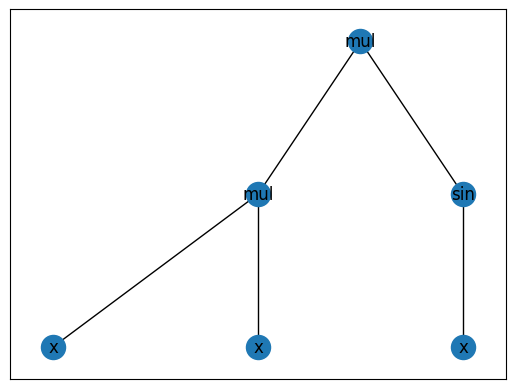

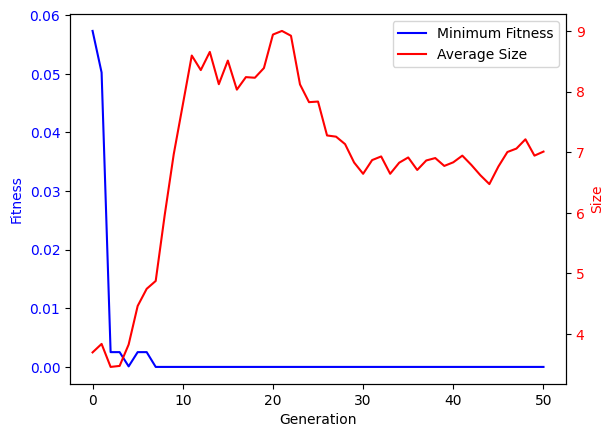

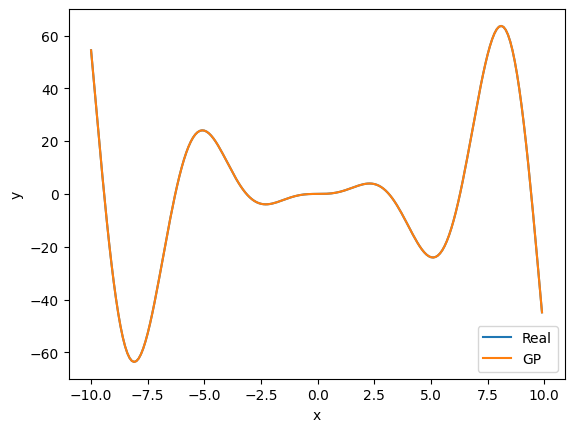

In [38]:
import sys
import time
import operator
import math
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import os

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 50                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.5, 0.5    # crossover and mutation probability for GP
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 0

"""
-------------------------------------------------------------------------
"""
folder = 'results'

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinSR
    del creator.IndividualSR
except:
    pass
creator.create("FitnessMinSR", base.Fitness, weights=(-1.0,))
creator.create("IndividualSR", gp.PrimitiveTree, fitness=creator.FitnessMinSR)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSR, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    # return math.sin(x)+math.cos(x)
    return math.sin(x)*x**2
    # return math.sin(x)+5*x**2
    # return x**4 + x**3 + x**2 + x

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------

random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats=mstats, halloffame=hof, verbose=True)

#--------------------------------------------------------------------

# plot GP tree
import utils.utils_11.plot_utils as plot_utils
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'symbreg_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness vs size trends
import matplotlib.pyplot as plt

gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["size"].select("avg")

fig = plt.figure("GP (fitness and tree size trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(folder+'/'+'trends_symbreg.png')

# plot real vs approximated values
x_ = points=[x/10. for x in range(-100,100)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox.compile(expr=hof[0])
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

# Exercise 2

In this exercise we will use GP for solving different kinds of problems. In the next cells you will find various other examples of GP applications. 
Through these examples, we will see how GP can be flexibly applied to solve a broad range of problems beyond function approximation, such as classification and evolution of computer programs, with different features and levels of complexity. In particular, consider the following four cells:


 1. exercise parity: the even parity problem$^{[1]}$. This is a classical benchmark problem used in the GP literature: the goal is to _evolve a Boolean expression_ that produces the correct value of the even parity bit, given as input an array of $n$ bits. For instance, for an input size $n=6$ (Parity-6 problem), the goal is to match the parity bit value for each of the $2^6 = 64$ possible combinations of 6 bits$^{[2]}$. Thus the fitness of an individual (i.e., a candidate Boolean expression) can be calculated simply as the number of successful cases (to be maximized), such that the maximum attainable fitness is 64 in the case of 6 bits inputs. Note that since in this case all inputs/outputs are bits (Boolean values), the primitive set contains only Boolean operators (`and`, `or`, `xor`, `not`).
	
 2. exercise multiplexer: the multiplexer problem$^{[3]}$ is another classical benchmark problem used in the GP literature. Similarly to the even parity problem, this problem deals with Boolean values: the goal is _evolve a Boolean expression_ that is capable to reproduce the behavior of an electronic multiplexer (mux)$^{[4]}$. In the default configuration, a 3-8 multiplexer is used (3 select entries, labeled from A0 to A2, and 8 data entries, from D0 to D7), for a total number of $2^3\times2^8=2048$ possible combinations. Thus the fitness is the number of correct outputs over all $2048$ cases, and its maximum value is $2048$.
	
 3. exercise spambase: the ''spam base'' problem$^{[5]}$ consists in \emph{evolving a classifier} that is able to distinguish as spam/non-spam a given database of emails	(saved in `utils/utils_11/data/spambase.csv`). The database consists of $4601$ _labeled_ samples (as such, GP is used here as a supervised ML algorithm), each corresponding to a different email and comprising $57$ mixed integer/real-valued features describing various lexicographic/syntactic characteristics of the email$^{[6]}$, in addition to a binary label indicating if the email is spam (1) or not (0). The evolved classifier must then return a Boolean value which must be `True` if the email is spam, `False` otherwise. To avoid overfitting, each tree generated during the GP run is evaluated on a set of $400$ samples randomly selected from the database (so that the maximum achievable fitness, i.e. number of correct classifications, is $400$). Note that since data of different kinds must be manipulated by the classifier (float and Boolean values), in this case the GP algorithm is configured to handle `strongly typed` operations, i.e. for each function in the primitive set the type of inputs and outputs is specified (e.g. to avoid calling a Boolean function with float	values as inputs).
	
 4. exercise ant: the ''artificial ant'' problem$^{[7]}$ consists in _evolving a program_ that can successfully control an artificial ant so that it can find and ''eat'' all the food located in a certain environment (i.e., placed along a twisting trail on a square toroidal grid). The program can use three operations, `move_forward`, `turn_right` and `turn_left`, to move the ant forward one cell, turn right or turn left. Each of these operations takes one timestep. The sensing function `if_food_ahead` looks into the cell the ant is currently facing and then executes one of its two arguments, depending upon whether that cell contains food or is empty. Two additional custom operations, `prog2` and	`prog3` are provided to facilitate the evolution of more complex behaviors. These custom operations take two and three other operations as arguments, respectively, and execute them in sequence. The evaluation function uses an instance of a simple simulator to evaluate a given individual (i.e., a candidate program). Each individual is given $600$ timesteps to navigate a virtual map obtained from an external file (see the file `utils/utils_11/data/santafe_trail.txt`, where `#`, `.` and `S` indicate, respectively, a cell with food, an empty cell, and the starting cell). The fitness of each individual corresponds to the number of pieces of food picked up. In this example, the trail contains $89$ pieces of food in total. Therefore, an optimal individual would achieve a fitness of $89$.

Since these scripts have all the same structure as the one used in the first exercise (besides obviously the details of the specific problem, especially the evaluator function, and the definition of the primitive set), we won't go into the details of each of them. You can spend some time having a look at the code and trying to get the main steps of each of the four examples.

![mux_trend.png](img/img_11/es2_merged.png)

<center>Example fitness trends for the 3-8 multiplexer problem (left) and the ''artificial ant'' problem (right).


Try to run some experiments with one or more of these four scripts. As in the previous exercise, at the end of the run each script will show you (and save on files, in the `results` folder) a graphical representation of the best evolved tree, as well as the evolutionary trends of the trees' fitness across generations, see figures above.

 1. In the case of the multiplexer problem there is an additional parameter (`MUX_SELECT_LINES`) that allows you to scale the problem, increasing or decreasing its dimensionality. Similarly, for the parity problem there is a parameter (`PARITY_FANIN_M`) that allows you to change the problem dimensionality. This in turn will make the problem easier, or harder. If you tested one of these two problems, consider changing these parameters and observe the GP's behavior. Note, however, that these problems (especially the multiplexer) become computationally very complex when the dimensionality increases, so that experiments can be quite time-consuming!
    
 2. What kind of performance do you get, in general, on the tested problems? What happens when you change the parametrization of GP? 


---
[1]: Parity problem: https://deap.readthedocs.io/en/master/examples/gp_parity.html
    
[2]: Parity wikipedia: https://en.wikipedia.org/wiki/Parity_bit
    
[3]: Multiplexer problem: https://deap.readthedocs.io/en/master/examples/gp_multiplexer.html
    
[4]: See https://en.wikipedia.org/wiki/Multiplexer for more details
    
[5]: Spam base problem: https://deap.readthedocs.io/en/master/examples/gp_spambase.html
    
[6]: See http://archive.ics.uci.edu/ml/datasets/Spambase for a complete description of the features
    
[7]: Ant problem: https://deap.readthedocs.io/en/master/examples/gp_ant.html

# Parity problem

gen	nevals	avg   	std     	min	max
0  	300   	512.02	0.475675	510	520
1  	184   	512.027	0.799555	504	520
2  	183   	512.107	0.917581	512	520
3  	189   	512.217	1.80639 	504	524
4  	178   	512.643	2.38666 	508	528
5  	177   	513.213	3.34681 	504	532
6  	183   	513.957	4.38575 	504	536
7  	194   	514.743	5.27675 	500	544
8  	189   	515.643	6.35946 	492	552
9  	174   	518.25 	7.79963 	464	552
10 	197   	519.533	8.46614 	496	552
11 	178   	521.447	11.4543 	480	560
12 	175   	524.527	13.1353 	464	560
13 	167   	529.447	14.6242 	496	576
14 	177   	532.173	16.6668 	472	576
15 	170   	535.813	17.7048 	456	576
16 	203   	535.053	19.7703 	464	568
17 	169   	539.467	19.3193 	464	576
18 	186   	539.407	20.9808 	464	576
19 	197   	537.987	21.6579 	464	576
20 	184   	539.48 	22.3212 	464	592
21 	198   	539.36 	23.694  	448	592
22 	176   	543.6  	24.0765 	448	592
23 	171   	546.32 	23.1414 	496	584
24 	187   	543.787	26.3708 	448	608
25 	164   	547.667	25.9814 	464	640
26 	198   	545.107	28.3258 	48

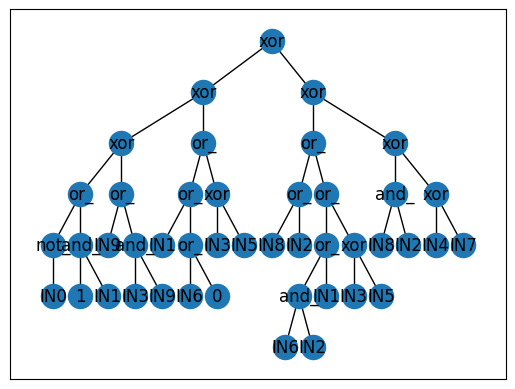

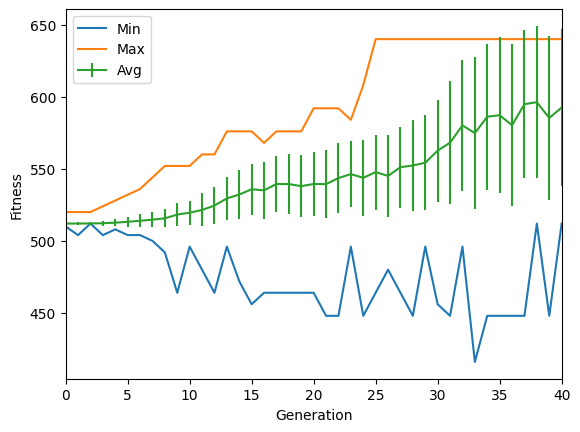

Best individual GP is xor(xor(xor(or_(not_(IN0), and_(1, IN1)), or_(IN9, and_(IN3, IN9))), or_(or_(IN1, or_(IN6, 0)), xor(IN3, IN5))), xor(or_(or_(IN8, IN2), or_(or_(and_(IN6, IN2), IN1), xor(IN3, IN5))), xor(and_(IN8, IN2), xor(IN4, IN7)))), (640.0,)


In [42]:
import sys
import time
import random
import operator

import numpy

import utils.utils_11.plot_utils as plot_utils
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.5, 0.2    # crossover and mutation probability for GP
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP

PARITY_FANIN_M = 10              # input size of the Parity problem
seed = 0
"""
-------------------------------------------------------------------------
"""

# Initialize Parity problem input and output matrices
PARITY_SIZE_M = 2**PARITY_FANIN_M

inputs = [None] * PARITY_SIZE_M
outputs = [None] * PARITY_SIZE_M

for i in range(PARITY_SIZE_M):
    inputs[i] = [None] * PARITY_FANIN_M
    value = i
    dividor = PARITY_SIZE_M
    parity = 1
    for j in range(PARITY_FANIN_M):
        dividor /= 2
        if value >= dividor:
            inputs[i][j] = 1
            parity = int(not parity)
            value -= dividor
        else:
            inputs[i][j] = 0
    outputs[i] = parity

pset = gp.PrimitiveSet("MAIN", PARITY_FANIN_M, "IN")
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.xor, 2)
pset.addPrimitive(operator.not_, 1)
pset.addTerminal(1)
pset.addTerminal(0)

try:
    del creator.FitnessMaxParity
    del creator.IndividualParity
except:
    pass
creator.create("FitnessMaxParity", base.Fitness, weights=(1.0,))
creator.create("IndividualParity", gp.PrimitiveTree, fitness=creator.FitnessMaxParity)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=3, max_=5)
toolbox.register("individual", tools.initIterate, creator.IndividualParity, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalParity(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(*in_) == out for in_, out in zip(inputs, outputs)),

toolbox.register("evaluate", evalParity)
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

#--------------------------------------------------------------------

random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats, halloffame=hof)

#--------------------------------------------------------------------

    
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,"parity"+'_'+str(seed),'results')

# plot fitness trends
plot_utils.plotTrends(logbook,"parity"+'_'+str(seed),'results')

#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

# Multiplexer problem

gen	nevals	avg    	std    	min	max 
0  	40    	1013.05	88.5291	840	1184
1  	38    	1097.65	67.5202	896	1184
2  	34    	1146.4 	53.4924	896	1216
3  	28    	1168   	35.0542	1024	1216
4  	31    	1177.6 	22.8526	1152	1216
5  	30    	1176.8 	33.1687	1088	1216
6  	38    	1183.2 	27.2353	1088	1216
7  	30    	1192   	34.1292	1024	1216
8  	36    	1179   	46.5339	992 	1248
9  	32    	1188   	30.5156	1152	1248
10 	35    	1198.8 	36.0244	1088	1248
11 	32    	1196.8 	52.4839	1024	1248
12 	33    	1197.6 	46.3103	1024	1248
13 	30    	1208.8 	51.8398	1024	1248
14 	34    	1192   	58.4602	1024	1248
15 	35    	1198.8 	40.062 	1088	1248
16 	38    	1212   	38.6575	1120	1248
17 	36    	1204   	35.5528	1152	1248
18 	30    	1216   	42.9325	1088	1248
19 	34    	1208   	43.3774	1088	1248
20 	29    	1212   	48.0999	1056	1248
21 	37    	1220   	43.6348	1088	1280
22 	25    	1228   	39.6384	1152	1280
23 	34    	1228.4 	59.9186	1024	1280
24 	31    	1230   	74.4634	992 	1280
25 	34    	1228   	72.5093	1024	1280
26 	3

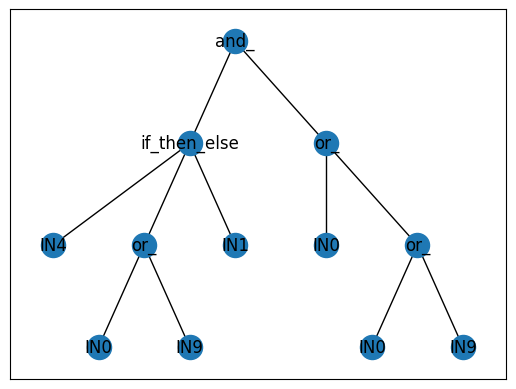

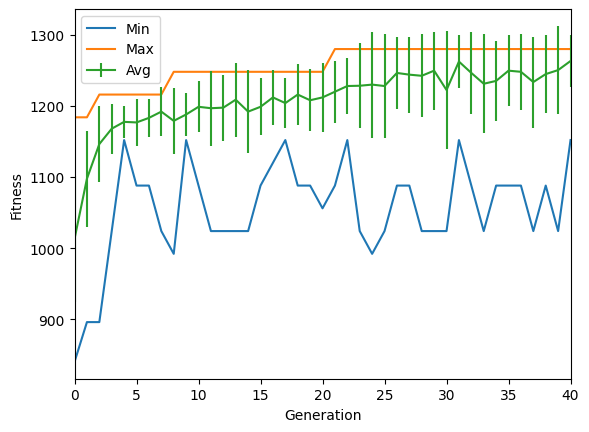

Best individual GP is and_(if_then_else(IN4, or_(IN0, IN9), IN1), or_(IN0, or_(IN0, IN9))), (1280.0,)


In [43]:
import sys
import time
import random
import operator

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import utils.utils_11.plot_utils as plot_utils
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 40                # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.8, 0.1    # crossover and mutation probability for GP
GP_TRNMT_SIZE = 7               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP

MUX_SELECT_LINES = 3            # number of select lines
seed = 0


"""
-------------------------------------------------------------------------
"""

def if_then_else(condition, out1, out2):
    return out1 if condition else out2

# Initialize Multiplexer problem input and output vectors
MUX_IN_LINES = 2 ** MUX_SELECT_LINES
MUX_TOTAL_LINES = MUX_SELECT_LINES + MUX_IN_LINES

# input : e.g. [A0 A1 A2 D0 D1 D2 D3 D4 D5 D6 D7] for a 8-3 mux
inputs = [[0] * MUX_TOTAL_LINES for i in range(2 ** MUX_TOTAL_LINES)]
outputs = [None] * (2 ** MUX_TOTAL_LINES)

for i in range(2 ** MUX_TOTAL_LINES):
    value = i
    divisor = 2 ** MUX_TOTAL_LINES
    # Fill the input bits
    for j in range(MUX_TOTAL_LINES):
        divisor /= 2
        if value >= divisor:
            inputs[i][j] = 1
            value -= divisor
    
    # Determine the corresponding output
    indexOutput = MUX_SELECT_LINES
    for j, k in enumerate(inputs[i][:MUX_SELECT_LINES]):
        indexOutput += k * 2**j
    outputs[i] = inputs[i][indexOutput]

pset = gp.PrimitiveSet("MAIN", MUX_TOTAL_LINES, "IN")
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.not_, 1)
pset.addPrimitive(if_then_else, 3)
pset.addTerminal(1)
pset.addTerminal(0)

try:
    del creator.FitnessMaxMux
    del creator.IndividualMux
except:
    pass
creator.create("FitnessMaxMux", base.Fitness, weights=(1.0,))
creator.create("IndividualMux", gp.PrimitiveTree, fitness=creator.FitnessMaxMux)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=2, max_=4)
toolbox.register("individual", tools.initIterate, creator.IndividualMux, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalMultiplexer(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(*in_) == out for in_, out in zip(inputs, outputs)),

toolbox.register("evaluate", evalMultiplexer)
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

#--------------------------------------------------------------------

random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats, halloffame=hof)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'multiplexer_'+str(seed),'results')

# plot fitness trends
plot_utils.plotTrends(logbook,'multiplexer_'+str(seed),'results')

#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))



# Spam Base problem

EphemeralConstant is already defined, if you changed it restart the kernel
gen	nevals	avg   	std    	min	max
0  	150   	202.16	46.4115	96 	313
1  	120   	226.107	34.8444	114	296
2  	117   	228.753	38.8287	116	324
3  	119   	232.453	38.0043	88 	324
4  	133   	234.227	43.907 	111	324
5  	124   	246.68 	46.3421	73 	317
6  	124   	252.4  	43.6907	141	322
7  	117   	256    	48.7866	80 	322
8  	127   	264.307	43.216 	101	322
9  	106   	267.873	46.4855	97 	329
10 	121   	266.76 	51.2571	108	332
11 	112   	278.067	40.5469	82 	332
12 	117   	282.067	42.0326	109	332
13 	125   	287.733	39.0003	131	347
14 	120   	286.807	43.5464	142	347
15 	114   	295.987	40.2542	141	347
16 	114   	300.48 	39.5437	156	347
17 	114   	303.467	41.847 	153	348
18 	126   	296.773	52.3646	100	347
19 	119   	309.633	39.7897	146	347
20 	115   	313.033	36.7551	149	349
21 	117   	312.76 	39.1138	132	351
22 	116   	315.827	39.9012	140	347
23 	112   	315.927	36.2078	152	348
24 	115   	310.98 	41.931 	134	347
25 	125   	318.73

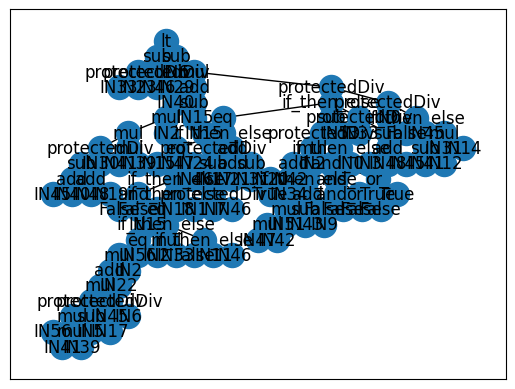

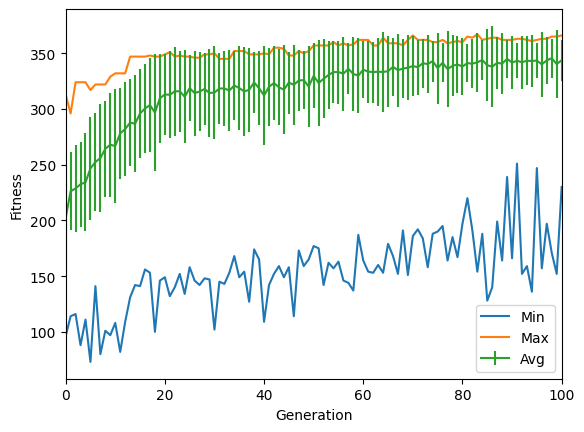

Best individual GP is lt(sub(protectedDiv(IN33, IN23), protectedDiv(IN46, IN29)), sub(IN6, mul(add(IN40, sub(mul(mul(protectedDiv(sub(add(IN45, IN40), add(IN48, IN19)), IN30), mul(IN41, IN39)), IN2), IN15)), protectedDiv(if_then_else(eq(IN15, if_then_else(eq(IN15, IN47), protectedDiv(IN24, sub(if_then_else(and_(False, False), if_then_else(eq(IN15, if_then_else(eq(mul(add(mul(protectedDiv(mul(IN56, mul(IN41, IN39)), sub(IN5, IN17)), protectedDiv(IN45, IN6)), IN22), IN2), IN56), mul(IN2, IN33), if_then_else(False, IN11, IN46))), IN18, IN1), protectedDiv(IN7, IN46)), IN46)), add(add(IN17, IN21), sub(IN31, IN20)))), sub(protectedDiv(mul(add(IN42, if_then_else(True, IN34, add(mul(mul(IN47, IN42), IN51), sub(IN43, IN9)))), IN2), if_then_else(and_(and_(and_(False, False), or_(False, False)), or_(True, True)), IN0, IN3)), IN53), protectedDiv(IN33, sub(add(IN48, IN45), sub(IN41, IN12)))), protectedDiv(IN0, if_then_else(False, IN45, mul(IN31, IN14))))))), (367.0,)


In [49]:
import sys
import time
import random
import operator
import csv
import itertools

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import utils.utils_11.plot_utils as plot_utils
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 150               # population size for GP
GP_NGEN = 100                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.3, 0.7    # crossover and mutation probability for GP
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 2                 # size of the Hall-of-Fame for GP
seed = 0 
"""
-------------------------------------------------------------------------
"""

# Read the spam list features and put it in a list of lists.
# The dataset is from http://archive.ics.uci.edu/ml/datasets/Spambase
# This example is a copy of the OpenBEAGLE example :
# http://beagle.gel.ulaval.ca/refmanual/beagle/html/d2/dbe/group__Spambase.html
with open("utils/utils_11/data/spambase.csv") as spambase:
    spamReader = csv.reader(spambase)
    spam = list(list(float(elem) for elem in row) for row in spamReader)

# defined a new primitive set for strongly typed GP
pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, 57), bool, "IN")

# boolean operators
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.not_, [bool], bool)

# floating point operators
# Define a protected division function
def protectedDiv(left, right):
    try: return left / right
    except ZeroDivisionError: return 1

pset.addPrimitive(operator.add, [float,float], float)
pset.addPrimitive(operator.sub, [float,float], float)
pset.addPrimitive(operator.mul, [float,float], float)
pset.addPrimitive(protectedDiv, [float,float], float)

# logic operators
# Define a new if-then-else function
def if_then_else(input, output1, output2):
    if input: return output1
    else: return output2

pset.addPrimitive(operator.lt, [float, float], bool)
pset.addPrimitive(operator.eq, [float, float], bool)
pset.addPrimitive(if_then_else, [bool, float, float], float)

# terminals
try:
    pset.addEphemeralConstant("rand100", lambda: random.random() * 100, float)
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.addTerminal(False, bool)
pset.addTerminal(True, bool)

try:
    del creator.FitnessMaxSpam
    del creator.IndividualSpam
except:
    pass
creator.create("FitnessMaxSpam", base.Fitness, weights=(1.0,))
creator.create("IndividualSpam", gp.PrimitiveTree, fitness=creator.FitnessMaxSpam)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSpam, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalSpambase(individual):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Randomly sample 400 mails in the spam database
    spam_samp = random.sample(spam, 400)
    # Evaluate the sum of correctly identified mail as spam
    result = sum(bool(func(*mail[:57])) is bool(mail[57]) for mail in spam_samp)
    return result,
    
toolbox.register("evaluate", evalSpambase)
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

#--------------------------------------------------------------------

random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats, halloffame=hof)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'spambase_'+str(seed),'results')

# plot fitness trends
plot_utils.plotTrends(logbook,'spambase_'+str(seed),'results')

#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))


# Ant problem

gen	nevals	avg    	std    	min	max
0  	300   	1.96333	3.36085	0  	16 
1  	175   	5.42667	5.26542	0  	30 
2  	192   	8.68667	6.74452	0  	33 
3  	186   	11.4733	9.61402	0  	38 
4  	197   	15.8567	12.3176	0  	39 
5  	195   	21.2267	14.2974	0  	54 
6  	197   	23.6067	15.6315	0  	54 
7  	172   	28.0433	15.7021	0  	54 
8  	189   	31.4767	17.6802	0  	54 
9  	167   	34.0267	21.3181	0  	54 
10 	179   	36.56  	22.0856	0  	58 
11 	196   	32.8533	23.0852	0  	58 
12 	176   	36.6233	22.3361	0  	58 
13 	175   	37.1933	22.5635	0  	58 
14 	192   	34.31  	23.8081	0  	58 
15 	180   	38.1367	23.568 	0  	58 
16 	156   	40.85  	23.324 	0  	58 
17 	184   	40.1733	23.4132	0  	58 
18 	188   	37.4933	23.7584	0  	58 
19 	163   	40.7433	23.0955	1  	58 
20 	190   	37.6367	23.7467	0  	58 
21 	182   	37.76  	23.7499	0  	61 
22 	180   	38.5567	23.696 	0  	61 
23 	199   	37.1033	24.1684	0  	61 
24 	179   	42.7967	23.225 	0  	61 
25 	183   	41.4033	24.3803	1  	61 
26 	182   	41.58  	24.325 	0  	63 
27 	177   	42.7333	2

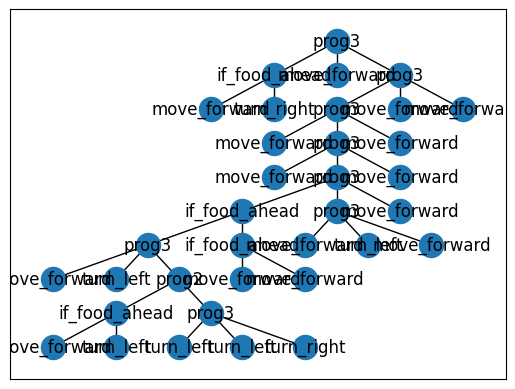

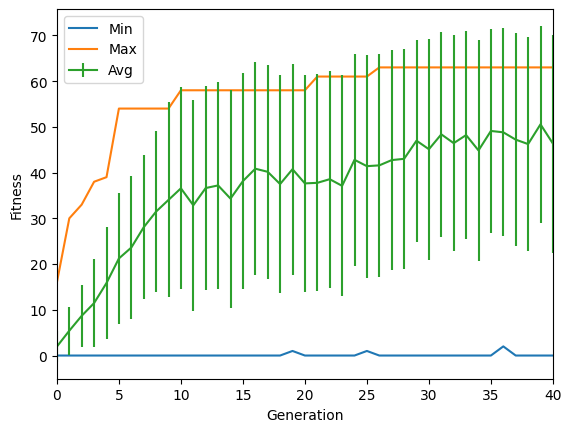

Best individual GP is prog3(if_food_ahead(move_forward, turn_right), move_forward, prog3(prog3(move_forward, prog3(move_forward, prog3(if_food_ahead(prog3(move_forward, turn_left, prog2(if_food_ahead(move_forward, turn_left), prog3(turn_left, turn_left, turn_right))), if_food_ahead(move_forward, move_forward)), prog3(move_forward, turn_left, move_forward), move_forward), move_forward), move_forward), move_forward, move_forward)), (63.0,)


In [39]:
import sys
import time
import copy
import random

import numpy

from functools import partial

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import utils.utils_11.plot_utils as plot_utils
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.5, 0.2    # crossover and mutation probability for GP
GP_TRNMT_SIZE = 7               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 0
"""
-------------------------------------------------------------------------
"""

def progn(*args):
    for arg in args:
        arg()

def prog2(out1, out2): 
    return partial(progn,out1,out2)

def prog3(out1, out2, out3):     
    return partial(progn,out1,out2,out3)

def if_then_else(condition, out1, out2):
    out1() if condition() else out2()

class AntSimulator(object):
    direction = ["north","east","south","west"]
    dir_row = [1, 0, -1, 0]
    dir_col = [0, 1, 0, -1]
    
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.eaten = 0
        self.routine = None
        
    def _reset(self):
        self.row = self.row_start 
        self.col = self.col_start 
        self.dir = 1
        self.moves = 0  
        self.eaten = 0
        self.matrix_exc = copy.deepcopy(self.matrix)

    @property
    def position(self):
        return (self.row, self.col, self.direction[self.dir])
            
    def turn_left(self): 
        if self.moves < self.max_moves:
            self.moves += 1
            self.dir = (self.dir - 1) % 4

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1    
            self.dir = (self.dir + 1) % 4
        
    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.dir_row[self.dir]) % self.matrix_row
            self.col = (self.col + self.dir_col[self.dir]) % self.matrix_col
            if self.matrix_exc[self.row][self.col] == "food":
                self.eaten += 1
            self.matrix_exc[self.row][self.col] = "passed"

    def sense_food(self):
        ahead_row = (self.row + self.dir_row[self.dir]) % self.matrix_row
        ahead_col = (self.col + self.dir_col[self.dir]) % self.matrix_col        
        return self.matrix_exc[ahead_row][ahead_col] == "food"
   
    def if_food_ahead(self, out1, out2):
        return partial(if_then_else, self.sense_food, out1, out2)
   
    def run(self,routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()
    
    def parse_matrix(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())
            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("food")
                elif col == ".":
                    self.matrix[-1].append("empty")
                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.dir = 1
        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

ant = AntSimulator(600)

pset = gp.PrimitiveSet("MAIN", 0)
pset.addPrimitive(ant.if_food_ahead, 2)
pset.addPrimitive(prog2, 2)
pset.addPrimitive(prog3, 3)
pset.addTerminal(ant.move_forward)
pset.addTerminal(ant.turn_left)
pset.addTerminal(ant.turn_right)

try:
    del creator.FitnessMaxAnt
    del creator.IndividualAnt
except:
    pass
creator.create("FitnessMaxAnt", base.Fitness, weights=(1.0,))
creator.create("IndividualAnt", gp.PrimitiveTree, fitness=creator.FitnessMaxAnt)
    
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.IndividualAnt, toolbox.expr_init)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalArtificialAnt(individual):
    # Transform the tree expression to functionnal Python code
    routine = gp.compile(individual, pset)
    # Run the generated routine
    ant.run(routine)
    return ant.eaten,

toolbox.register("evaluate", evalArtificialAnt)
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

#--------------------------------------------------------------------

random.seed(seed)

with  open("utils/utils_11/data/santafe_trail.txt") as trail_file:
  ant.parse_matrix(trail_file)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats, halloffame=hof)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'ant_'+str(seed),'results')

# plot fitness trends
plot_utils.plotTrends(logbook,'ant_'+str(seed),'results')

#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

# Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

 - What are the main strengths and limitations of GP, in your opinion?
 
 - In which kind of applications do you think that GP could be more useful than other kinds of black-box Machine Learning techniques, such as Neural Network? Why?

# BONUS
In the enxt cell there is a variant of the first exercise. The main difference between this and the original exercise is that in this variant a _competitive co-evolutionary approach_ is used for solving the symbolic regression problem. Rather than determining _a priori_ the samples that are used for evolving the GP trees, this approach uses a Genetic Algorithm (GA) to _evolve_ a fix-sized set of samples that is fed to a tree evolved by GP. The goal of GP is to _minimize_ the MSE, while the goal of GA is to _maximize_ it, i.e. to generate a set of samples that produces the largest fitting error in the evolving GP trees. 

To do so, at the initial generation a random GA (GP) individual is sampled from the corresponding initial population and tested against all individuals in the initial population of GP (GA). Then at each subsequent generation the best GA individual (i.e., the set of samples that produced the largest MSE so far) is fed to all the trees in the current GP population. Vice versa, the best GP tree (i.e., the one that showed the lowest MSE so far) is fed with all the individuals (i.e., sets of samples) in the current GA population. This form of _arms race_ forces the GP trees to become more adaptive, avoiding overfitting to a particular set of samples, thus also becoming better at generalizing and extrapolating data outside the specific set of samples that was used for fitting. Note, however, that in some cases this approach may lead to excessively large trees that are even impossible to evaluate$^{[1]}$. Indeed, due to an implicit limitation of Python, trees deeper than 90 layers cannot be evaluated. In these cases the script gives the following error:
`MemoryError: DEAP : Error in tree evaluation : Python cannot evaluate a tree higher than 90. To avoid this problem, you should use bloat control on your operators. See the DEAP documentation for more information. DEAP will now abort`.

Run some tests with the co-evolutionary variant of the symbolic regression experiment. At the end of the evolutionary process, you should see a separate fitness trend for the GA and the GP evolution. 

 - Is this approach better (in terms of time to converge, approximation results, and robustness across multiple runs) than the one based on GP alone? Why?
 - Try to change the parameters of the co-evolutionary scheme to test how the system behaves under different configurations. Focus in particular on the population size used in the two algorithms (`GA_POP_SIZE` and `GP_POP_SIZE`), and the number of samples contained in each GA individual (`GA_REP_IND`). 



---
[1]: This is the typical effect of _bloat_. In the most extreme cases, this could even cause an internal Python `MemoryError`


EphemeralConstant is already defined, if you changed it restart the kernel
gen	type	evals	std     	min      	avg     	max    
0  	ga  	200  	0.582636	0.0112203	0.819328	2.50841
0  	gp  	200  	1.39032 	0.171771 	1.45288 	11.6687
1  	ga  	200  	0.604592	0.168379 	1.30741 	3.05711
1  	gp  	200  	0.736531	0.171771 	0.991244	8.24883
2  	ga  	200  	0.2224  	0.0129667	0.643604	1.28511
2  	gp  	200  	1.46078 	0.588458 	2.70175 	9.3423 
3  	ga  	200  	0.608533	0.110068 	0.887331	3.07837
3  	gp  	200  	1.55667 	0.28129  	2.18775 	10.7951
4  	ga  	200  	0.0890113	0.0666093	0.295027	0.534802
4  	gp  	200  	1361.23  	0.416397 	98.2135 	19300.8 
5  	ga  	200  	0.0882271	0.0591694	0.362483	0.682184
5  	gp  	200  	1.66461  	0.533129 	2.23534 	7.92605 
6  	ga  	200  	0.0840199	0.183163 	0.434764	0.717104
6  	gp  	200  	2.06524  	0.0761449	2.18399 	12.5326 
7  	ga  	200  	0.03049  	0.00606137	0.0563672	0.165127
7  	gp  	200  	54.1484  	0.011147  	5.54104  	768.967 
8  	ga  	200  	0.0286712	0.00474571	0.

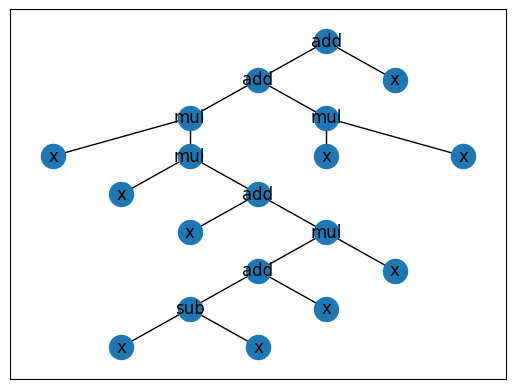

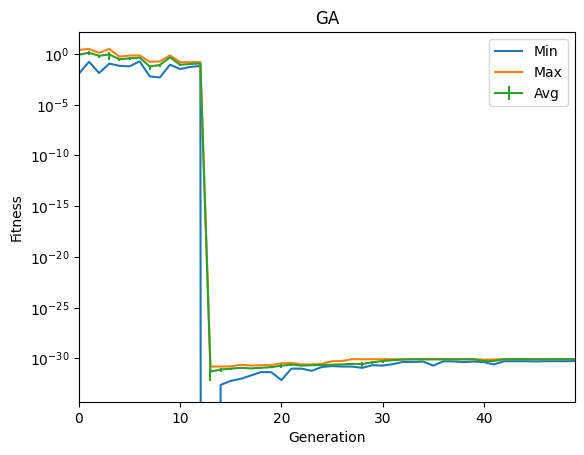

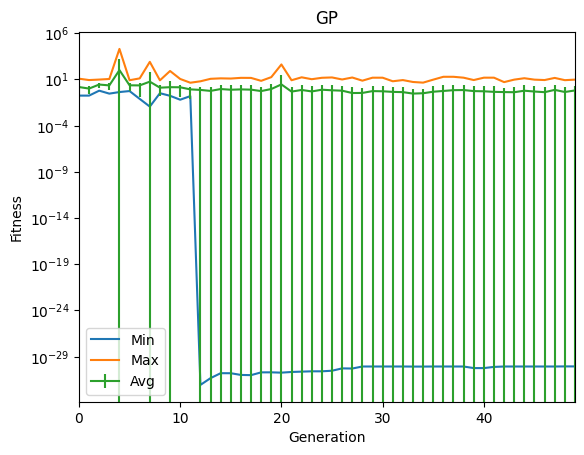

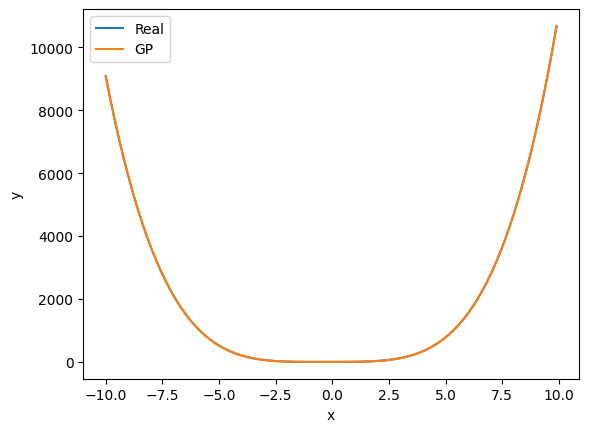

Best individual GA is [0.43291841913168577, 1.0061305073137574, 0.96010421302157, 0.7767650911177563, 0.8595197012188527, 0.9896833192732963, 1.0106852480700454, 0.7502433483448386, 0.399049958852268, 0.9530746696427658], (8.702121860719286e-31,)
Best individual GP is add(add(mul(x, mul(x, add(x, mul(add(sub(x, x), x), x)))), mul(x, x)), x), (8.689795909075208e-31,)


In [21]:
import os

import sys
import time
import random
import operator
import math

import numpy

from deap import base
from deap import creator
from deap import tools
from deap import gp

import utils.utils_11.plot_utils as plot_utils
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GA_POP_SIZE = 200               # population size for GA
NGEN = 50                       # number of generations (for both GA and GP)
GA_TRNMT_SIZE = 3               # tournament size for GA
GA_REP_IND = 10                 # number of arrays for each GA individual
GA_CXPB, GA_MUTPB = 0.5, 0.2    # crossover and mutation probability for GA


GP_POP_SIZE = 200               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.5, 0.2    # crossover and mutation probability for GP
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP

seed = 0
"""
-------------------------------------------------------------------------
"""

try:
    del creator.FitnessMaxGA
    del creator.IndividualGA
except:
    pass
creator.create("FitnessMaxGA", base.Fitness, weights=(1.0,))
creator.create("IndividualGA", list, fitness=creator.FitnessMaxGA)
    
toolbox_ga = base.Toolbox()

toolbox_ga.register("float", random.uniform, -1, 1)
toolbox_ga.register("individual", tools.initRepeat, creator.IndividualGA, toolbox_ga.float, GA_REP_IND)
toolbox_ga.register("population", tools.initRepeat, list, toolbox_ga.individual)

toolbox_ga.register("select", tools.selTournament, tournsize=GA_TRNMT_SIZE)
toolbox_ga.register("mate", tools.cxTwoPoint)
# we leave the internal parameters of mutation (mu, sigma and indpb) as they are
toolbox_ga.register("mutate", tools.mutGaussian, mu=0, sigma=0.01, indpb=0.05)

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinGP
    del creator.IndividualGP
except:
    pass
creator.create("FitnessMinGP", base.Fitness, weights=(-1.0,))
creator.create("IndividualGP", gp.PrimitiveTree, fitness=creator.FitnessMinGP)

toolbox_gp = base.Toolbox()
toolbox_gp.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox_gp.register("individual", tools.initIterate, creator.IndividualGP, toolbox_gp.expr)
toolbox_gp.register("population", tools.initRepeat, list, toolbox_gp.individual)
toolbox_gp.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    #return math.sin(x)+math.cos(x)
    #return math.sin(x)*x**2
    #return math.sin(x)+5*x**2
    return x**4 + x**3 + x**2 + x

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox_gp.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox_gp.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox_gp.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox_gp.register("mate", gp.cxOnePoint)
toolbox_gp.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox_gp.register("mutate", gp.mutUniform, expr=toolbox_gp.expr_mut, pset=pset)

toolbox_gp.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox_gp.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------
random.seed(seed)

pop_ga = toolbox_ga.population(n=GA_POP_SIZE)
pop_gp = toolbox_gp.population(n=GP_POP_SIZE)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

logbook = tools.Logbook()
logbook.header = "gen", "type", "evals", "std", "min", "avg", "max"

best_ga = tools.selRandom(pop_ga, 1)[0]
best_gp = tools.selRandom(pop_gp, 1)[0]

for ind in pop_gp:
    ind.fitness.values = toolbox_gp.evaluate(ind, points=best_ga)  

for ind in pop_ga:
    ind.fitness.values = toolbox_gp.evaluate(best_gp, points=ind)

record = stats.compile(pop_ga)
logbook.record(gen=0, type='ga', evals=len(pop_ga), **record)

record = stats.compile(pop_gp)
logbook.record(gen=0, type='gp', evals=len(pop_gp), **record)

print(logbook.stream)

# Begin the evolution
for g in range(1, NGEN):
    # Select and clone the offspring
    off_ga = toolbox_ga.select(pop_ga, len(pop_ga))
    off_gp = toolbox_gp.select(pop_gp, len(pop_gp))
    off_ga = [toolbox_ga.clone(ind) for ind in off_ga]        
    off_gp = [toolbox_gp.clone(ind) for ind in off_gp]

    # Apply crossover and mutation
    for ind1, ind2 in zip(off_ga[::2], off_ga[1::2]):
        if random.random() < GA_CXPB:
            toolbox_ga.mate(ind1, ind2)
            del ind1.fitness.values
            del ind2.fitness.values

    for ind1, ind2 in zip(off_gp[::2], off_gp[1::2]):
        if random.random() < GP_CXPB:
            toolbox_gp.mate(ind1, ind2)
            del ind1.fitness.values
            del ind2.fitness.values

    for ind in off_ga:
        if random.random() < GA_MUTPB:
            toolbox_ga.mutate(ind)
            del ind.fitness.values

    for ind in off_gp:
        if random.random() < GP_MUTPB:
            toolbox_gp.mutate(ind)
            del ind.fitness.values

    # Evaluate the individuals with an invalid fitness
    for ind in off_ga:
        ind.fitness.values = toolbox_gp.evaluate(best_gp, points=ind)

    for ind in off_gp:
        ind.fitness.values = toolbox_gp.evaluate(ind, points=best_ga)

    # Replace the old population by the offspring
    pop_ga = off_ga
    pop_gp = off_gp

    record = stats.compile(pop_ga)
    logbook.record(gen=g, type='ga', evals=len(pop_ga), **record)

    record = stats.compile(pop_gp)
    logbook.record(gen=g, type='gp', evals=len(pop_gp), **record)
    print(logbook.stream)

    best_ga = tools.selBest(pop_ga, 1)[0]
    best_gp = tools.selBest(pop_gp, 1)[0]

#--------------------------------------------------------------------

# plot GP tree

nodes, edges, labels = gp.graph(best_gp)

plot_utils.plotTree(nodes,edges,labels,'coev_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness trends
import matplotlib.pyplot as plt

import os
folder = 'results'
if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
name = 'coev_'+str(seed)

gen = numpy.array(logbook.select("gen"))
fit_type = numpy.array(logbook.select("type"))
fit_min = numpy.array(logbook.select("min"))
fit_max = numpy.array(logbook.select("max"))
fit_avg = numpy.array(logbook.select("avg"))
fit_std = numpy.array(logbook.select("std"))

ga_entries = numpy.array([i for i,val in enumerate(fit_type) if val=='ga'])
gp_entries = numpy.array([i for i,val in enumerate(fit_type) if val=='gp'])

fig = plt.figure("GA (fitness trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen[ga_entries], fit_min[ga_entries], label="Min")
line2 = ax1.plot(gen[ga_entries], fit_max[ga_entries], label="Max")
line3 = ax1.errorbar(gen[ga_entries], fit_avg[ga_entries], yerr=fit_std[ga_entries], label="Avg")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
ax1.set_yscale("log")
ax1.set_xlim(0,len(gen[ga_entries])-1)
ax1.set_title('GA')
ax1.legend()
plt.savefig(folder+'/'+'trends_'+name+'_ga.png')

fig = plt.figure("GP (fitness trend)")
ax2 = fig.add_subplot(111)
line1 = ax2.plot(gen[gp_entries], fit_min[gp_entries], label="Min")
line2 = ax2.plot(gen[gp_entries], fit_max[gp_entries], label="Max")
line3 = ax2.errorbar(gen[gp_entries], fit_avg[gp_entries], yerr=fit_std[gp_entries], label="Avg")
ax2.set_xlabel("Generation")
ax2.set_ylabel("Fitness")
ax2.set_yscale("log")
ax2.set_xlim(0,len(gen[gp_entries])-1)
ax2.set_title('GP')
ax2.legend()
plt.savefig(folder+'/'+'trends_'+name+'_gp.png')

plt.show()

# plot real vs. GP-approximated values
x_ = points=[x/10. for x in range(-100,100)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox_gp.compile(expr=best_gp)
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
plt.show()

#--------------------------------------------------------------------

print("Best individual GA is %s, %s" % (best_ga, best_ga.fitness.values))
print("Best individual GP is %s, %s" % (best_gp, best_gp.fitness.values))